# Lecture 24

In this lecture, we will attempt to follow the first paper on Deep Learning in High Energy physics [P. Baldi, et al](https://arxiv.org/pdf/1402.4735.pdf). This paper demonstrates that Deep Neural Networks can learn from rad data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios. We will focus on the SUSY benchmark. The physics behind this sample will be discussed in class.

This is a large dataset, so it shouldn't be stored on GitHub. We'll download it directly from the source and then decompress it:

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M  100  879M    0     0  4146k      0  0:03:37  0:03:37 --:--:-- 6013k  0     0  4013k      0  0:03:44  0:02:18  0:01:26 4245k39M    0     0  4117k      0  0:03:38  0:02:38  0:01:00 4759k 0  4068k      0  0:03:41  0:03:22  0:00:19 4014k


In [3]:
!gunzip SUSY.csv.gz

SUSY.csv already exists -- do you wish to overwrite (y or n)? ^C


The data is provided as a comma separated file:

In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

Each row represents a LHC collision event. Each column contains some observable from that event. Unlike other CSV files we have used before, this file doesn't have the names of the columns on the first line. This information is provided in the documentation for this dataset. The variable names are:

In [6]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [7]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET"]
FeatureNames=[  "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Now we can read the data into a pandas dataframe:

In [9]:
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluating the dataframe:

In [10]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
5,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
6,0.0,0.437818,-1.119883,-1.336823,0.502320,-1.717515,1.017067,0.215619,-0.461200,0.323671,0.173626,0.411898,0.370525,0.798260,0.671369,0.385910,0.515522,0.479110,0.029058
7,0.0,0.571656,0.205696,0.425950,0.578514,0.927399,-1.101478,0.116555,1.549753,0.174421,0.223450,0.523164,0.289889,0.491710,0.334593,0.514246,0.268207,0.315795,0.125728
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
9,0.0,1.001869,-0.471788,0.555614,1.233368,1.255548,-1.052491,0.437615,-1.333052,0.326858,-0.111678,1.435708,0.755201,0.466779,0.454541,1.446331,0.592259,1.325197,0.083014


The first column stores the "truth" label of whether an event was signal or background. Pandas makes it easy to create dataframes that store only the signal or background events:

In [11]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

## Searching for SUSY

The background dataset here corresponds to known physics processes which Particle Physicists have used to devise a theory called the "Standard Model". This theory is the best tested theory in human history, with its predictions compared to experiments at high degree of precision. Notetheless, there is good reason to believe that there are other types of particles out there that are not described by the Standard Model. So the experiments running at the LHC attempt to search for these particles. The signal dataset corresponds to one example of such a possbility assuming the existence of another hypothesized theory known as Supersymmetry (SUSY). If SUSY exists, then the LHC will produce both the Standard Model and SUSY particles. The detectors will detector and reconstruct subsetquent particles produced as the result of the decay of these partciles. To prove that SUSY exists, Physicists have to show that the see events which are inconsistent with just the hypothesis of just the Standard Model. 

The LHC produces 40 million collisions per second but a SUSY particle might be produced once every day. You can imagine that the SUSY signal is then very difficult to see. The job of finding SUSY is identify the unique properties of events where a SUSY particles decayed in comparision to the Standard Model. Fortunately, the Standard Model produces leptons (particles like the electron) much less frequently than hadrons (particles like protons). SUSY particles decay to leptons fairly frequently. Therefore, if we limit ourselves to events with lots of leptons, we will have a sample of events that could be more enhanced in SUSY vs SM events. 

But requiring leptons is not enough. In the scenario corresponding to the dataset we are using here, we expect 10 times more SM background events than signal SUSY events. So the SUSY events will still be burried under SM backgrounds. We'll have to find other unique properties of SUSY events. 

We can see that some of the distribution of observables for signal and background events look different. 

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


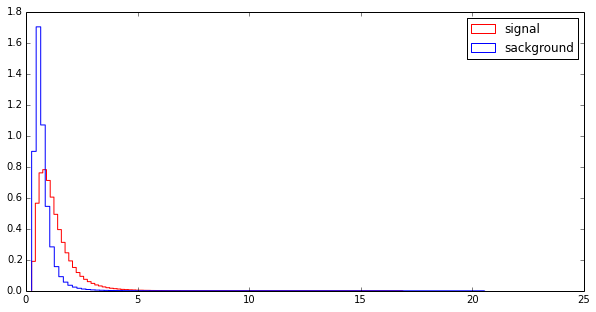

l_1_eta


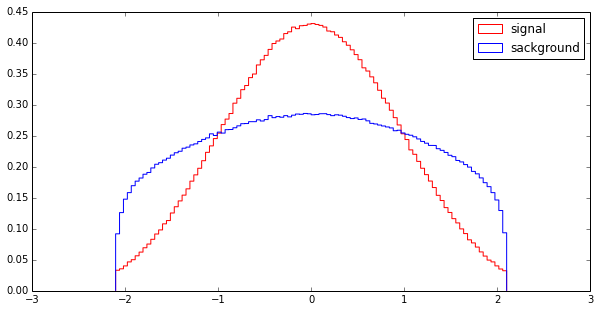

l_1_phi


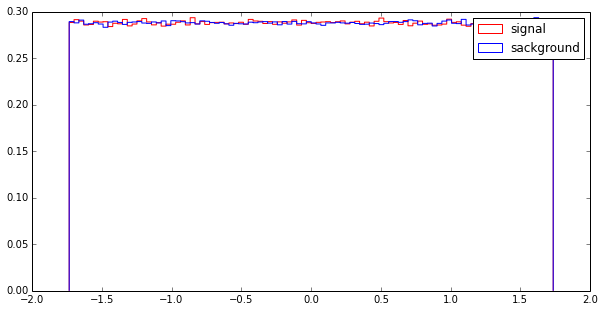

l_2_pT


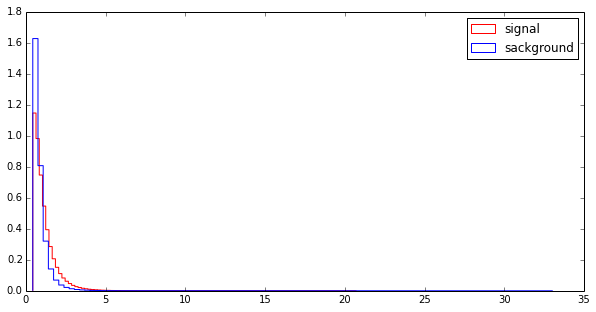

l_2_eta


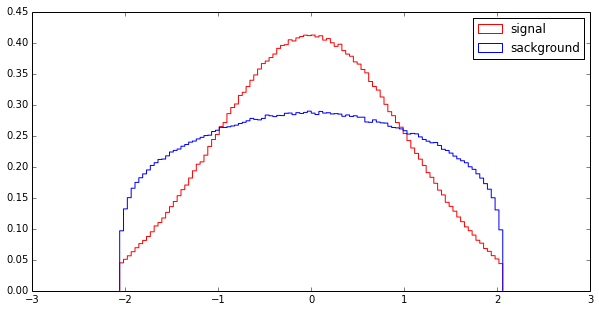

l_2_phi


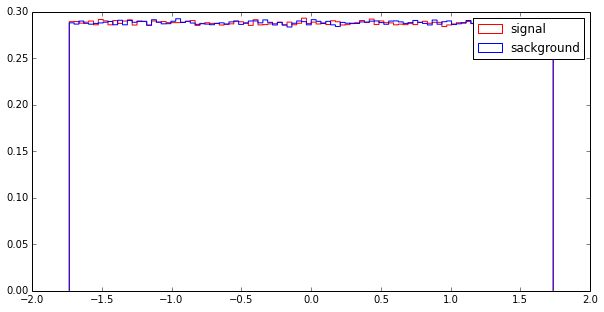

MET


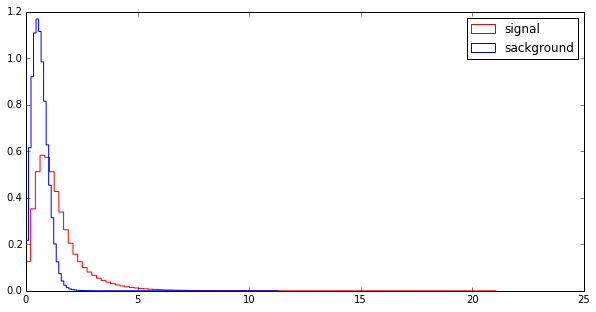

MET_phi


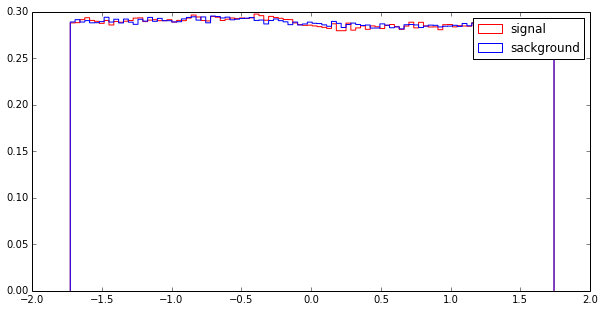

MET_rel


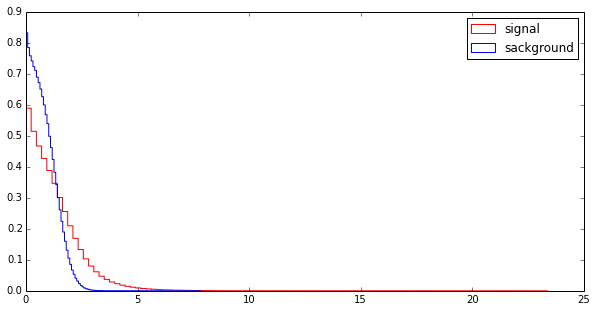

axial_MET


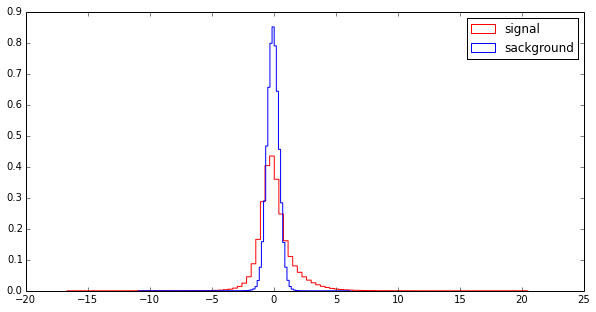

M_R


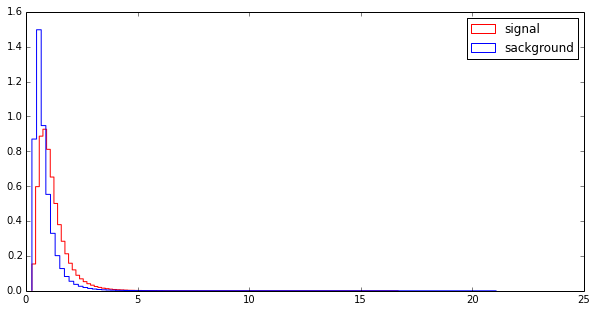

M_TR_2


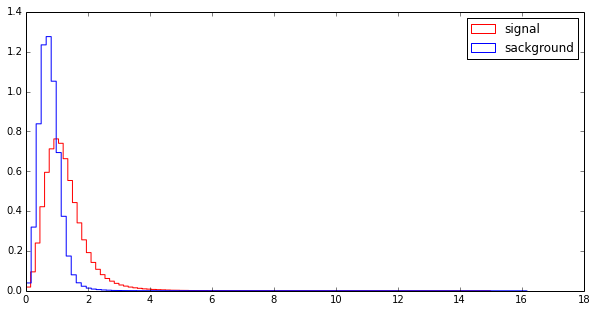

R


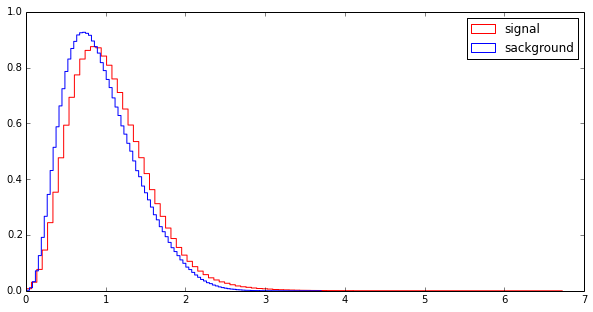

MT2


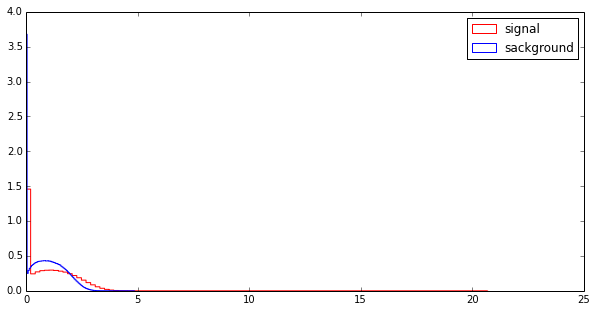

S_R


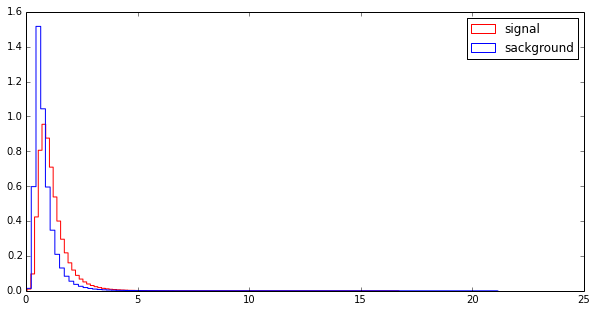

M_Delta_R


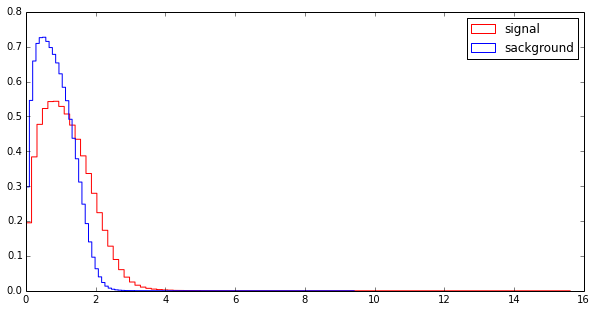

dPhi_r_b


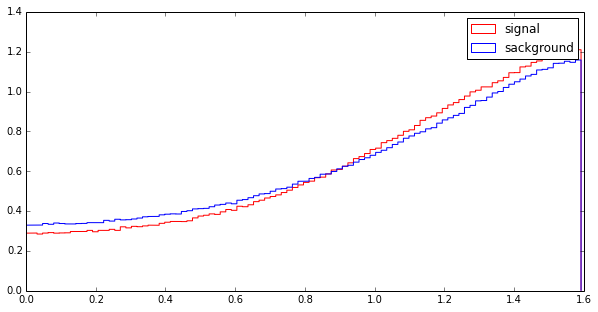

cos_theta_r1


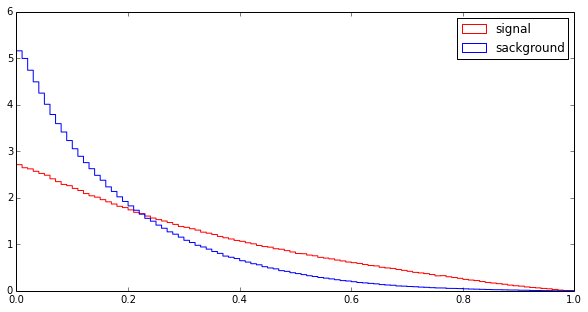

In [12]:
for var in VarNames[1:]:
    print var
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",normed=True, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="sackground",normed=True, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

One of the best variables to identify SUSY is MET (or missing energy). The MET of SUSY events is typically very large. So, get a very clear sample of SUSY events, we could just consider events with large value of MET. 

In [13]:
print "Fraction of signal events with MET > 2.5:", float(df_sig[df_sig.MET>2.5].shape[0]) / df_sig.shape[0]
print "Fraction of background events with MET > 2.5:", float(df_bkg[df_bkg.MET>2.5].shape[0]) / df_bkg.shape[0]

Fraction of signal events with MET > 2.5: 0.123344553587
Fraction of background events with MET > 2.5: 0.000640077163219


What we computed here are the * True Positive Rate * (TPR) and the * False Positive Rate * (FPR).

Now these are simulated events, where we have created as many signal as background events. But as mentioned typically we expect the background events to be produced much more copiously than signal. And, we produced a lot of simulated events, but a given dataset from the LHC might correspond to just a fraction of this data. For example, we may expect to only have 10 signal and 1000 background events in a year's worth of collecting data. 

So these distributions would look very different:

l_1_pT


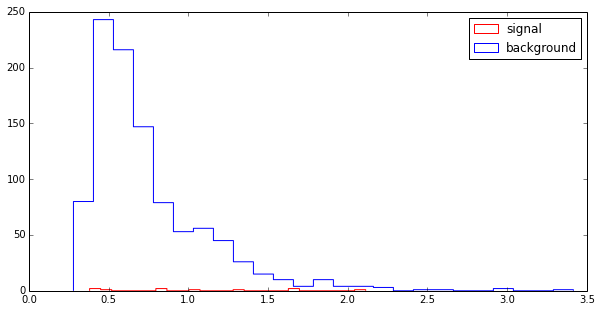

l_1_eta


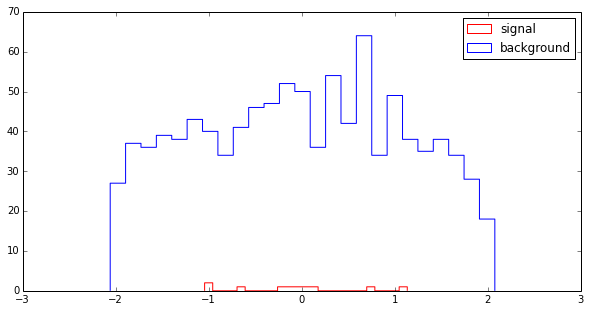

l_1_phi


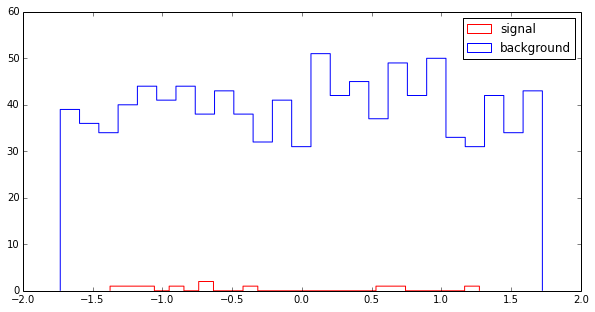

l_2_pT


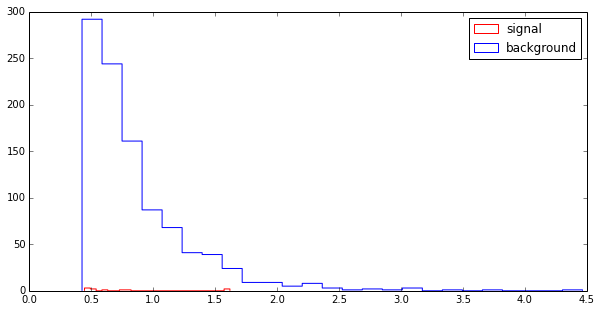

l_2_eta


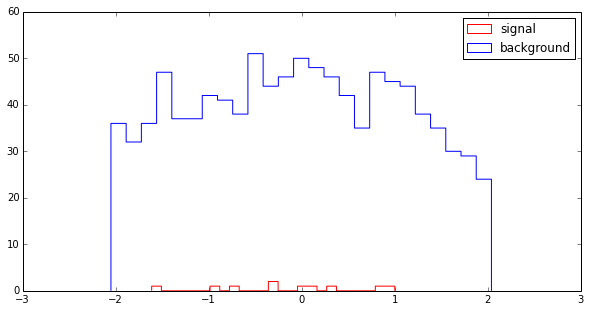

l_2_phi


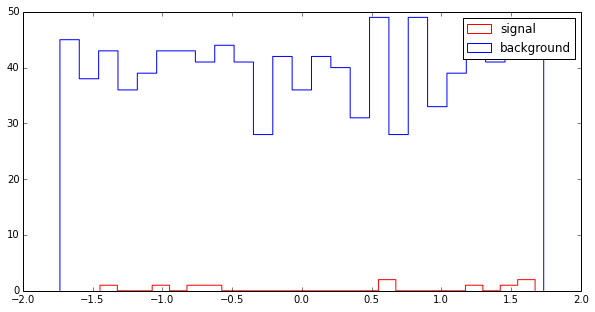

MET


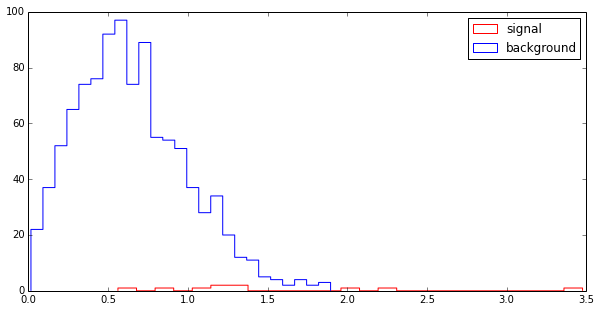

MET_phi


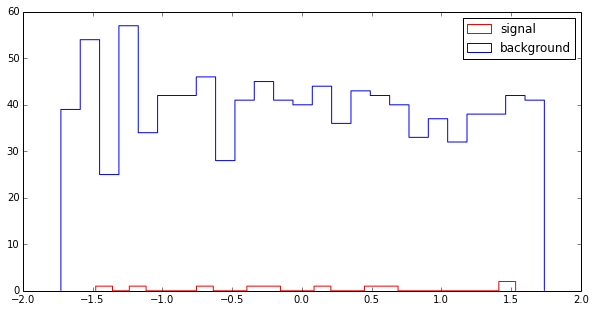

MET_rel


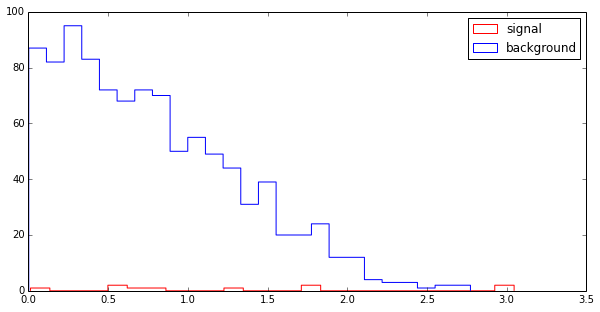

axial_MET


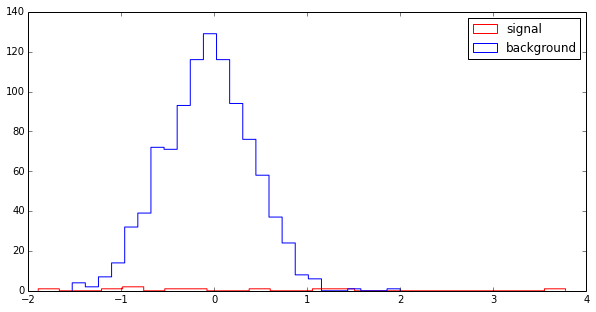

M_R


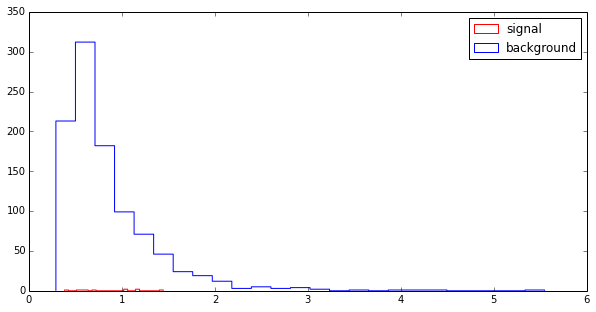

M_TR_2


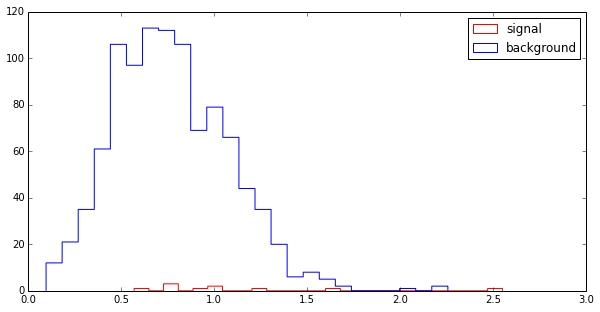

R


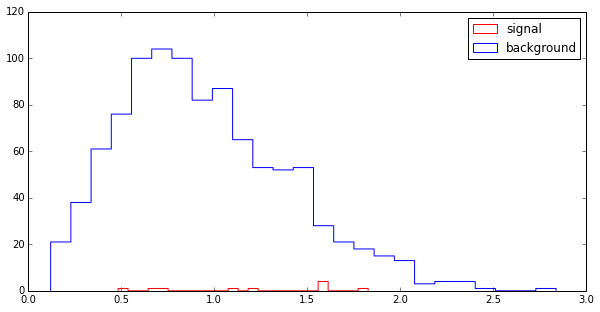

MT2


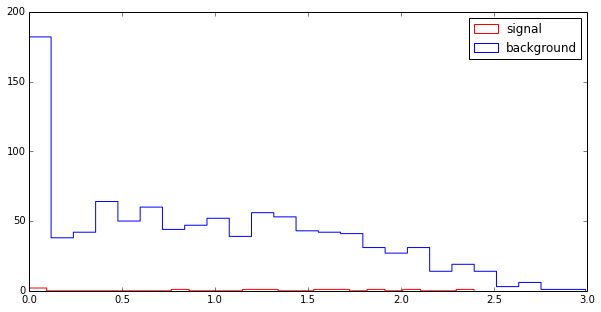

S_R


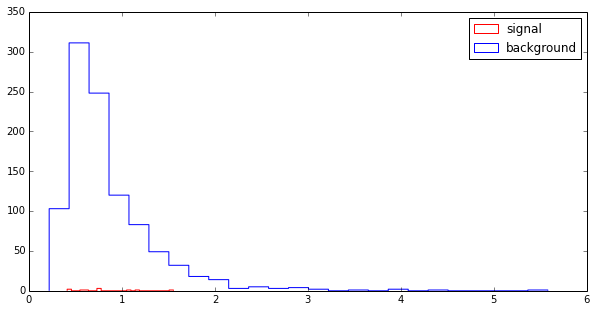

M_Delta_R


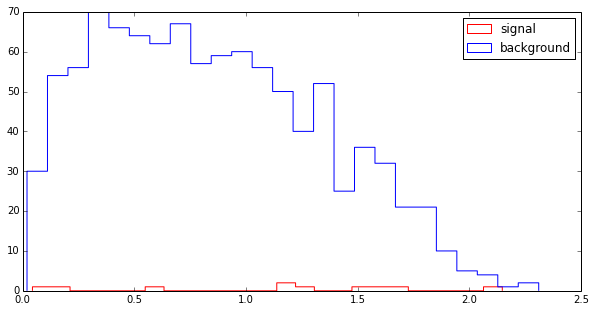

dPhi_r_b


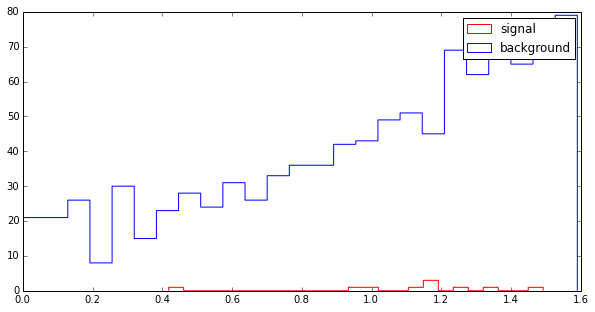

cos_theta_r1


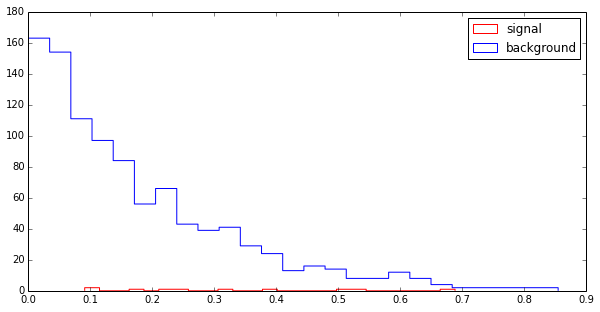

In [14]:
for var in VarNames[1:]:
    print var
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var])[:10],bins=25,histtype="step", color="red",label="signal", stacked=True)
    plt.hist(np.array(df_bkg[var])[:1000],bins=25,histtype="step", color="blue", label="background", stacked=True)
    plt.legend(loc='upper right')
    plt.show()

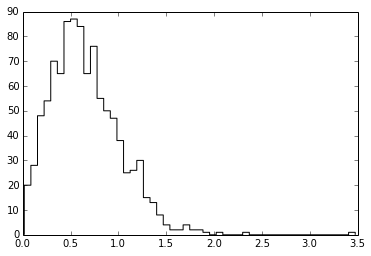

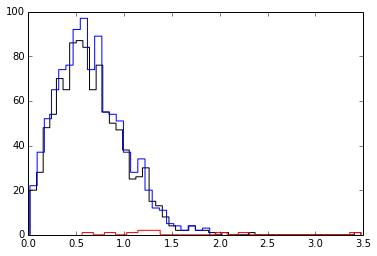

In [15]:
var="MET"
data=np.concatenate((np.array(df_sig[var])[:10],np.array(df_bkg[var])[:1000]))
plt.hist(data,bins=50,histtype="step", color="black")
plt.show()

plt.hist(data,bins=50,histtype="step", color="black", label="data")
plt.hist(np.array(df_sig[var])[:10],bins=25,histtype="step", color="red",label="signal", stacked=True)
plt.hist(np.array(df_bkg[var])[:1000],bins=25,histtype="step", color="blue", label="background", stacked=True)
plt.show()


What if select events with MET > 2.5?

In [16]:
print "Expected number of signal events with MET > 2.5:", 10.*float(df_sig[df_sig.MET>2.5].shape[0]) / df_sig.shape[0]
print "Expected nunmber background events with MET > 2.5:", 1000.*float(df_bkg[df_bkg.MET>2.5].shape[0]) / df_bkg.shape[0]

Expected number of signal events with MET > 2.5: 1.23344553587
Expected nunmber background events with MET > 2.5: 0.640077163219


These are the mean values for how many events we expect. A give experiment may give more or less. We are doing a counting experiment here... if you recall from earlier lectures, the expected values will be Poisson distributed.

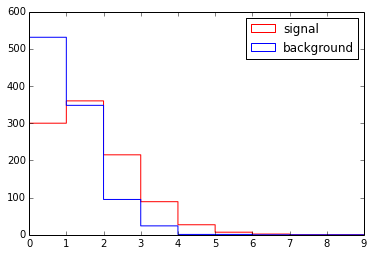

In [17]:
plt.hist(np.random.poisson(1.2,1000),bins=range(0,10),histtype="step", color="red",label="signal", stacked=True)
plt.hist(np.random.poisson(.64,1000),bins=range(0,10),histtype="step", color="blue",label="background", stacked=True)
plt.legend(loc='upper right')
plt.show()

So for example if we see 2 events, the probability of it just being SM is:

In [18]:
n_bkg=np.random.poisson(.64,1000)
np.sum(n_bkg>=2)/1000.

0.125

That's not good enough for physicists... we need to be 99% sure.

And we can make a ROC curve and evaluate the AUC:

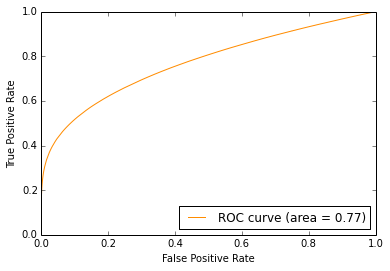

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(df.signal, df.MET)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()